## Now let'try with a new example

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3db
from matplotlib.pyplot import subplots, show
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Load the ex1.csv file by using the Ws capability. The file contains sell price (y) versus house area (in square feet) (x).

Remind to add vector assignement to data_1.values

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YiaJob6uTcDVElr7CTjWhrloL9H7tP1gR_GmDWCli8sh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='matrix-donotdelete-pr-dch8wobsozzamt',Key='ex1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
Xini=df_data_1.values[:,0]
y=df_data_1.values[:,1]


## Show data on a scatter plot

Plotting Data ...


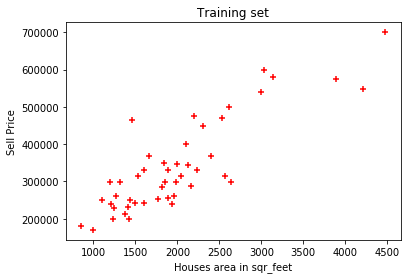

In [4]:
from matplotlib.pyplot import subplots, show
print('Plotting Data ...')

fig, ax = subplots()
ax.scatter(Xini,y, facecolor='red',marker='+')
ax.set_title("Training set")
ax.set_xlabel("Houses area in sq_feet")
ax.set_ylabel("Sell Price")
show()

## Initialize θ and modify the X array for the "Cost Function" evaluation 
Set Iteration=2000 and alpha=1.5

In [5]:
lunghezza=len(Xini)
#
#
z = np.ones([lunghezza,1])
X = np.zeros(lunghezza)

from sklearn import preprocessing
X= preprocessing.normalize([Xini])[0,:]


X=np.column_stack((z, X))

theta = np.zeros([2])# initialize fitting parameters

# Some gradient descent settings
iterations = 2000
alpha = 1.5

## Write the "Cost Function" evaluation 

In [6]:
#COMPUTECOST Compute cost for linear regression
#   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y

# Initialize some useful values
def computeCost(x, y, theta):
    m = len(y); # number of training examples

# You need to return the following variables correctly 
    J = 0;

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta
#               You should set J to the cost.

    Jtmp=sum((np.dot(x,theta)-y)**2)

    J = (1/(2 * m))*Jtmp

#    print(J)
# =========================================================================
    return J
#print(X)
#print(theta)
computeCost(X, y, theta)

65591548106.457443

## Execute Gradient Descent

In [7]:
#function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
m = len(y); # number of training examples

num_iters=iterations
theta1 = np.zeros([2])
J_history = np.zeros(num_iters)

for iter in range(num_iters):

    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    #

    Gtmp=np.dot(X,theta1)-y

    a1=theta1[0] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,0]))
    b1=theta1[1] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,1]))
    theta1[0] = a1
    theta1[1] = b1

    # ============================================================

    # Save the cost J in every iteration    
    J_history[iter] = computeCost(X, y, theta1)

## Show results

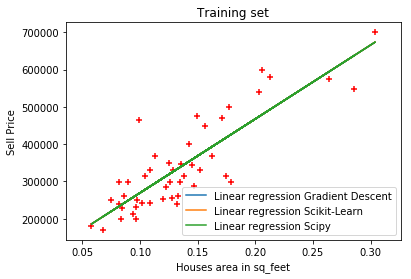

Gradient Descent Gradient and Intercept 1982065.12833 71329.72922
R_squared from Gradient Descent 0.73100374876

Scikit-Learn Gradient and intercept [ 1982500.24684876] 71270.4924487
Scikit-Learn R-squared 0.731003783976

Scipy Gradient and intercept 1982500.24685 71270.4924487
Scipy R-squared 0.731003783976



In [10]:
#
# Compare with Scikit-learn Linear regression 
from sklearn.linear_model import LinearRegression
skl = LinearRegression()
skl.fit(X[:,1].reshape(-1,1), y.ravel())

#Compare with Scipy 
from scipy import stats
gradient,intercept,r_value,p_value,std_err=stats.linregress(X[:,1],y)

# Plot the linear fit
fig, ax = subplots()
ax.scatter(X[:,1],y, facecolor='red',marker='+')
ax.set_title("Training set")
ax.set_xlabel("Houses area in sq_feet")
ax.set_ylabel("Sell Price")
#Gradient descent
ax.plot(X[:,1],np.dot(X, theta1), label='Linear regression Gradient Descent')
#Scikit-Learn
ax.plot(X[:,1], skl.intercept_+skl.coef_*X[:,1], label='Linear regression Scikit-Learn')
#Scipy
ax.plot(X[:,1], intercept+gradient*X[:,1], label='Linear regression Scipy')
ax.legend(loc=4)

show()
#print R square in the different cases
#Gradient Descent
y_mean=np.mean(y)
SS_tot=0
SS_reg=0
SS_res=0
for i in range(len(y)):
    SS_tot=SS_tot + (y[i]-y_mean)**2
    f_i=np.dot(np.transpose(theta1),[1, X[i,1]])
    SS_reg=SS_reg + (f_i-y_mean)**2
    SS_res=SS_res + (y[i]-f_i)**2
R_squared=1-(SS_res/SS_tot)
print("Gradient Descent Gradient and Intercept", theta1[1], theta1[0])
print("R_squared from Gradient Descent", R_squared)
print("")
#Scikit-Learn
from sklearn.metrics import r2_score
print("Scikit-Learn Gradient and intercept",skl.coef_,skl.intercept_)
print("Scikit-Learn R-squared",r2_score(y,skl.intercept_+skl.coef_*X[:,1]))
print("")
#Scipy
print("Scipy Gradient and intercept",gradient,intercept)
print ("Scipy R-squared",r_value**2)
print("")


## Plot J with a 3D wireframe

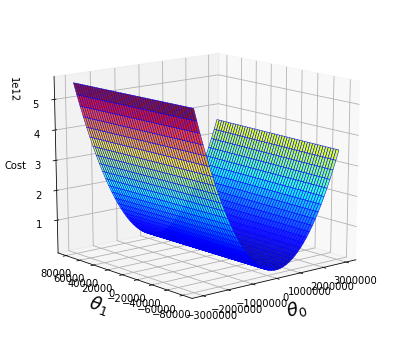

In [9]:
#============= Part 4: Visualizing J(theta_0, theta_1) =============
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# Grid over which we will calculate J
theta0_vals = np.linspace(-3000000, 3000000, 50)
theta1_vals = np.linspace(-80000, 80000, 50)
x_axe, y_axe = np.meshgrid(theta0_vals, theta1_vals, indexing='xy')

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

# Calculate J_vals-values based on grid's input
for (i,j),v in np.ndenumerate(J_vals):
    t = [theta0_vals[j], theta1_vals[i]]
    J_vals[i,j] = computeCost(X,y, t)

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1,2,2, projection='3d')

# Plot
ax.plot_surface(x_axe, y_axe, J_vals, rstride=1, cstride=1, alpha=0.9, cmap=plt.cm.jet, linewidth=0.5, edgecolors='b' )
ax.set_zlabel('Cost')
ax.set_zlim(J_vals.min(),J_vals.max())
ax.view_init(elev=15, azim=230)


for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=18)
    ax.set_ylabel(r'$\theta_1$', fontsize=18)